### SISTEMAS INTELIGENTES II
### PARCIAL - I (Parte II)

#### 1. Espacio para las respuestas a las preguntas de la primera parte

### Pregunta 1.
El objetivo de la regresión lineal es que busca describir cómo cambia la variable dependiente en dunción de la o las variables independientes, teniendo entre ellas una relación lineal. Esto permite predecir el valor de la variable dependiente para cada uno de los valores de las variables independientes.

### Pregunta 2.
Los coeficientes β0 y β1 permiten construir la línea de regresión que mejor se ajusta a los datos que se tienen en el modelo de regresión lineal.

### Pregunta 3.
La estructura básica de un árbol de decisión es un nodo raíz, que a la vez es un nodo padre, que se divide en dos o más nodos hijos unidos por ramas, que son la toma de decisiones, y al final solo hay nodos hojas que ya son las decisiones finales.

### Pregunta 4.
Los árboles de decisión trabajan con variables categóricas y con varibles numéricas, por lo que se hacen muy versátiles a la hora de trabajar con ellos.

### Pregunta 5.
Ya que son muy fáciles de interpretar, incluso una persona que no sepa del tema puede intuir facilmente lo que está viendo en el árbol.
Y como dije antes, se puede trabajar con variables categóricas y con varibles numéricas.

### Pregunta 6.
Esto es basado en el criterio de decisión, el cual se hace en los nodos padres y de ahí, según el criterio de decisión salen los nodos hijos, esto se llama división, y continua hasta que se cumple la condición o hasta que se llega a la profundidad máxima.

### Pregunta 7.
La ganancia de información es la medida que se utiliza para determinar cúal es la mejor característica para realizar la división en un conjunto de datos en el árbol.

### Pregunta 8.
El Índice de Gini es una métrica que calcula con qué frecuencia se identificaría incorrectamente un elemento elegido al azar.
En los árboles de decisión, el índice de Gini se utiliza para evaluar la calidad de la distribución midiendo la diferencia entre el nodo original y la suma ponderada de sus hijos.

### Pregunta 9.
Ventaja: el índice de Gini es más rápido de calcular y es más sensible a los cambios en las probabilidades de clase.
Desventaja: favorece distribuciones que crean subnodos del mismo tamaño, aunque sean no es óptimo para la precisión de la clasificación.

### Pregunta 10.
Una función booleana sobre atributos discretos puede representarse utilizando árboles de decisión se evalua una decisión, haciendo una pregunta o condición en la que se pueda responder con verdadero o falso.

---

#### 2. Análisis multivariado (valor = 1.5)

Dataset: SalarioTrabajosAnalista.csv<br>
Objetivo: El objetivo de este análisis es comprender cómo las diferentes variables independientes influyen en el salario de un empleado y construir un modelo que pueda predecir el salario en función de estas variables.<br>

1. Preprocesamiento de datos: Comienza por preprocesar los datos, asegurándote de manejar valores faltantes, codificar variables categóricas y normalizar las variables si es necesario.

    

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("SalariosTrabajosAnalista.csv", sep=",")
data.head()

work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT  Machine Learning Engineer   
2       2024               SE              FT  Machine Learning Engineer   
3       2024               SE              FT  Machine Learning Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   90000             USD          90000                 AE             0   
1  180500             USD         180500                 US             0   
2   96200             USD          96200                 US             0   
3  235000             USD         235000                 AU             0   
4  175000             USD         175000                 AU             0   

  company_location company_size  
0               AE            L  
1               US            M  
2               US            M  
3               AU            M  
4               AU            M

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Variables categóricas en el conjunto de datos: {}".format(object_cols))
print(data.head())

Variables categóricas en el conjunto de datos: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT  Machine Learning Engineer   
2       2024               SE              FT  Machine Learning Engineer   
3       2024               SE              FT  Machine Learning Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   90000             USD          90000                 AE             0   
1  180500             USD         180500                 US             0   
2   96200             USD          96200                 US             0   
3  235000             USD         235000                 A

In [ ]:
#Etiquetar y codificar las características
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("Todas las características son numéricas")
print(data.head())

Todas las características son numéricas
   work_year  experience_level  employment_type  job_title  salary  \
0       2024                 3                2          2   90000   
1       2024                 3                2        111  180500   
2       2024                 3                2        111   96200   
3       2024                 3                2        111  235000   
4       2024                 3                2        111  175000   

   salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0               21          90000                   1             0   
1               21         180500                  84             0   
2               21          96200                  84             0   
3               21         235000                   6             0   
4               21         175000                   6             0   

   company_location  company_size  
0                 1             0  
1                74             1  
2   

In [ ]:
# Seleccionar las características a escalar (todas excepto 'normalized_salary')
features_to_scale = ['work_year', 'experience_level', 'employment_type', 'salary',
                     'remote_ratio', 'company_location', 'company_size', 'experience_level',
                     'job_title', 'salary_currency', 'employee_residence']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Escalar las características seleccionadas
scaled_features = scaler.fit_transform(data[features_to_scale])

# Crear un DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale)

# Mostrar el DataFrame resultante
print("Todas las características estan estandarizadas")

Todas las características estan estandarizadas


In [ ]:
scaled_data.head()

work_year  experience_level  employment_type    salary  remote_ratio  \
0   1.329869          0.594053         0.030261 -0.207573     -0.714088   
1   1.329869          0.594053         0.030261  0.039599     -0.714088   
2   1.329869          0.594053         0.030261 -0.190640     -0.714088   
3   1.329869          0.594053         0.030261  0.188449     -0.714088   
4   1.329869          0.594053         0.030261  0.024578     -0.714088   

   company_location  company_size  experience_level  job_title  \
0         -4.011691     -3.368481          0.594053  -2.010086   
1          0.357804      0.200520          0.594053   1.303647   
2          0.357804      0.200520          0.594053   1.303647   
3         -3.712411      0.200520          0.594053   1.303647   
4         -3.712411      0.200520          0.594053   1.303647   

   salary_currency  employee_residence  
0         0.287542           -3.998994  
1         0.287542            0.361786  
2         0.287542            0.361786  
3         0.287542           -3.736296  
4         0.287542           -3.736296

2. División de datos: Divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. Utiliza el conjunto de entrenamiento para ajustar el modelo y el conjunto de prueba para evaluar su rendimiento.

    

In [ ]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('salary', axis=1)  # Todas las características excepto 'salary'
y = data['salary']  # La variable objetivo es 'salary'

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (por ejemplo, 80% para entrenamiento y 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Ajuste del modelo: Utiliza una regresión lineal multivariada para ajustar el modelo a tus datos. Esto implicará ajustar un modelo que relacione las variables dependientes con las variables independientes.

    

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Imprimir los coeficientes del modelo
print("Coeficientes del modelo:", modelo_regresion.coef_)

# Imprimir el término de intercepción del modelo
print("Término de intercepción:", modelo_regresion.intercept_)

Coeficientes del modelo: [-2.30093305e+04 -3.62419886e+03  1.52731225e+04  2.80333335e+02
 -3.24067513e+03  8.26067642e-01 -1.68756893e+03  5.18796527e+01
  1.64910589e+03 -8.53215174e+04]
Término de intercepción: 46707645.6760986


4. Evaluación del modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación como el coeficiente de determinación (R^2), el error cuadrático medio (MSE) o el error absoluto medio (MAE). Estas métricas te ayudarán a comprender qué tan bien se ajusta el modelo a los datos y si es capaz de predecir con precisión la situación del pedido o el feedback del cliente.

    

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.012712984635157576


5. Interpretación de resultados: Una vez que hayas ajustado el modelo, interpreta los coeficientes para comprender cómo cada variable independiente influye en la situación del pedido o el feedback del cliente. Esto te ayudará a identificar qué características demográficas y de ubicación tienen el mayor impacto en el comportamiento de pedido de comida en línea.

El coeficiente de determinación (R^2) es demasiado bajo, con un 1,27%, lo que significa que el modelo no es lo suficientemente variable y por lo tanto no explica la variable objetivo. Como confirmación adicional, los coeficientes del modelo no son lo sufientemente grandes, además de que hay coeficientes negativos, lo que indica que hay relaciones negativas en el modelo.

---

#### 3. Análisis exploratorio de datos (valor = 2.5)
Haz todo un análisis exploratorio de datos sobre este conjunto de datos. Asegúrate de proporcionar la interpretación de cada aspecto tratado en tu análisis y la justificación de las operaciones que hagas.<br>
Objetivo: Agrupar a los empleados en diferentes segmentos o clústeres según sus características laborales y personales.<br>

###### Se carga el dataset y se muestran las primeras filas.

In [ ]:
data = pd.read_csv("SalariosTrabajosAnalista.csv", sep=",")
data.head()

work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT  Machine Learning Engineer   
2       2024               SE              FT  Machine Learning Engineer   
3       2024               SE              FT  Machine Learning Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   90000             USD          90000                 AE             0   
1  180500             USD         180500                 US             0   
2   96200             USD          96200                 US             0   
3  235000             USD         235000                 AU             0   
4  175000             USD         175000                 AU             0   

  company_location company_size  
0               AE            L  
1               US            M  
2               US            M  
3               AU            M  
4               AU            M

###### Análisis exploratorio al dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           13972 non-null  int64
 1   experience_level    13972 non-null  int32
 2   employment_type     13972 non-null  int32
 3   job_title           13972 non-null  int32
 4   salary              13972 non-null  int64
 5   salary_currency     13972 non-null  int32
 6   salary_in_usd       13972 non-null  int64
 7   employee_residence  13972 non-null  int32
 8   remote_ratio        13972 non-null  int64
 9   company_location    13972 non-null  int32
 10  company_size        13972 non-null  int32
dtypes: int32(7), int64(4)
memory usage: 818.8 KB


In [ ]:
data.describe()

work_year  experience_level  employment_type     job_title  \
count  13972.000000      13972.000000     13972.000000  13972.000000   
mean    2023.085600          2.486044         1.996994     68.118594   
std        0.687612          0.865200         0.099341     32.894587   
min     2020.000000          0.000000         0.000000      0.000000   
25%     2023.000000          2.000000         2.000000     42.000000   
50%     2023.000000          3.000000         2.000000     52.000000   
75%     2024.000000          3.000000         2.000000     83.000000   
max     2024.000000          3.000000         3.000000    145.000000   

             salary  salary_currency  salary_in_usd  employee_residence  \
count  1.397200e+04     13972.000000   13972.000000        13972.000000   
mean   1.660011e+05        19.879545  150028.812124           77.114014   
std    3.661545e+05         3.896799   68634.306349           19.033973   
min    1.400000e+04         0.000000   15000.000000            0.000000   
25%    1.040000e+05        21.000000  103000.000000           84.000000   
50%    1.422000e+05        21.000000  141600.000000           84.000000   
75%    1.880000e+05        21.000000  185900.000000           84.000000   
max    3.040000e+07        22.000000  800000.000000           87.000000   

       remote_ratio  company_location  company_size  
count  13972.000000      13972.000000  13972.000000  
mean      33.334526         68.022259      0.943816  
std       46.682931         16.707332      0.280201  
min        0.000000          0.000000      0.000000  
25%        0.000000         74.000000      1.000000  
50%        0.000000         74.000000      1.000000  
75%      100.000000         74.000000      1.000000  
max      100.000000         76.000000      2.000000

###### Hay algunas características categóricas en nuestro marco de datos; como hay algunas características en dtype: object). Así que tendremos que codificarlas en formas numéricas más adelante.

###### Se eliminan los registros nulos

In [ ]:
data = data.dropna()
print("Cantidad de registros actualizada a: {}".format(len(data)))

Cantidad de registros actualizada a: 13663


###### Crear algunas nuevas características y eliminar las redundantes

In [ ]:
# Calcular la cantidad de años en la empresa restando el año actual al año de inicio en el trabajo
data['years_in_company'] = pd.Timestamp.now().year - data['work_year']

# Normalizar el salario dividiendo cada valor de salario por la media del salario
data['normalized_salary'] = data['salary'] / data['salary'].mean()

# Crear una nueva característica para indicar la preferencia de trabajo remoto
data['remote_work_preference'] = (data['remote_ratio'] > 0).astype(int)

# Eliminar las características que no son necesarias para el análisis
data.drop(['salary_in_usd', 'salary_currency', 'employee_residence', 'job_title'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   work_year               13972 non-null  int64  
 1   experience_level        13972 non-null  object 
 2   employment_type         13972 non-null  object 
 3   salary                  13972 non-null  int64  
 4   remote_ratio            13972 non-null  int64  
 5   company_location        13972 non-null  object 
 6   company_size            13972 non-null  object 
 7   years_in_company        13972 non-null  int64  
 8   normalized_salary       13972 non-null  float64
 9   remote_work_preference  13972 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 1.0+ MB


<Figure size 800x550 with 0 Axes>

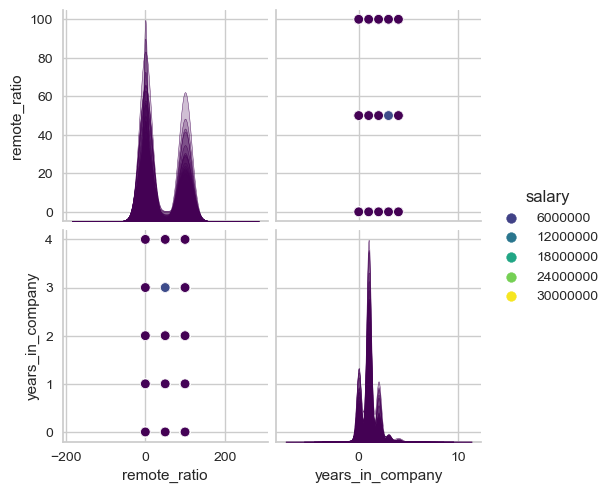

In [ ]:
# Graficar algunas características
plot = ["experience_level", "remote_ratio", "company_size", "years_in_company", "salary"]

plt.figure()
sns.pairplot(data[plot], hue='salary', palette='viridis')
plt.show()

###### Eliminación de outliers

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior
límite_inferior = Q1 - 1.5 * IQR
límite_superior = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = data[(data['salary'] < límite_inferior) | (data['salary'] > límite_superior)]

data = data[(data['salary'] >= límite_inferior) & (data['salary'] <= límite_superior)]
print("La cantidad de datos después de eliminar outliers es:", len(data))

La cantidad de datos después de eliminar outliers es: 13663


#### Examinar la correlación de las variables

<Axes: >

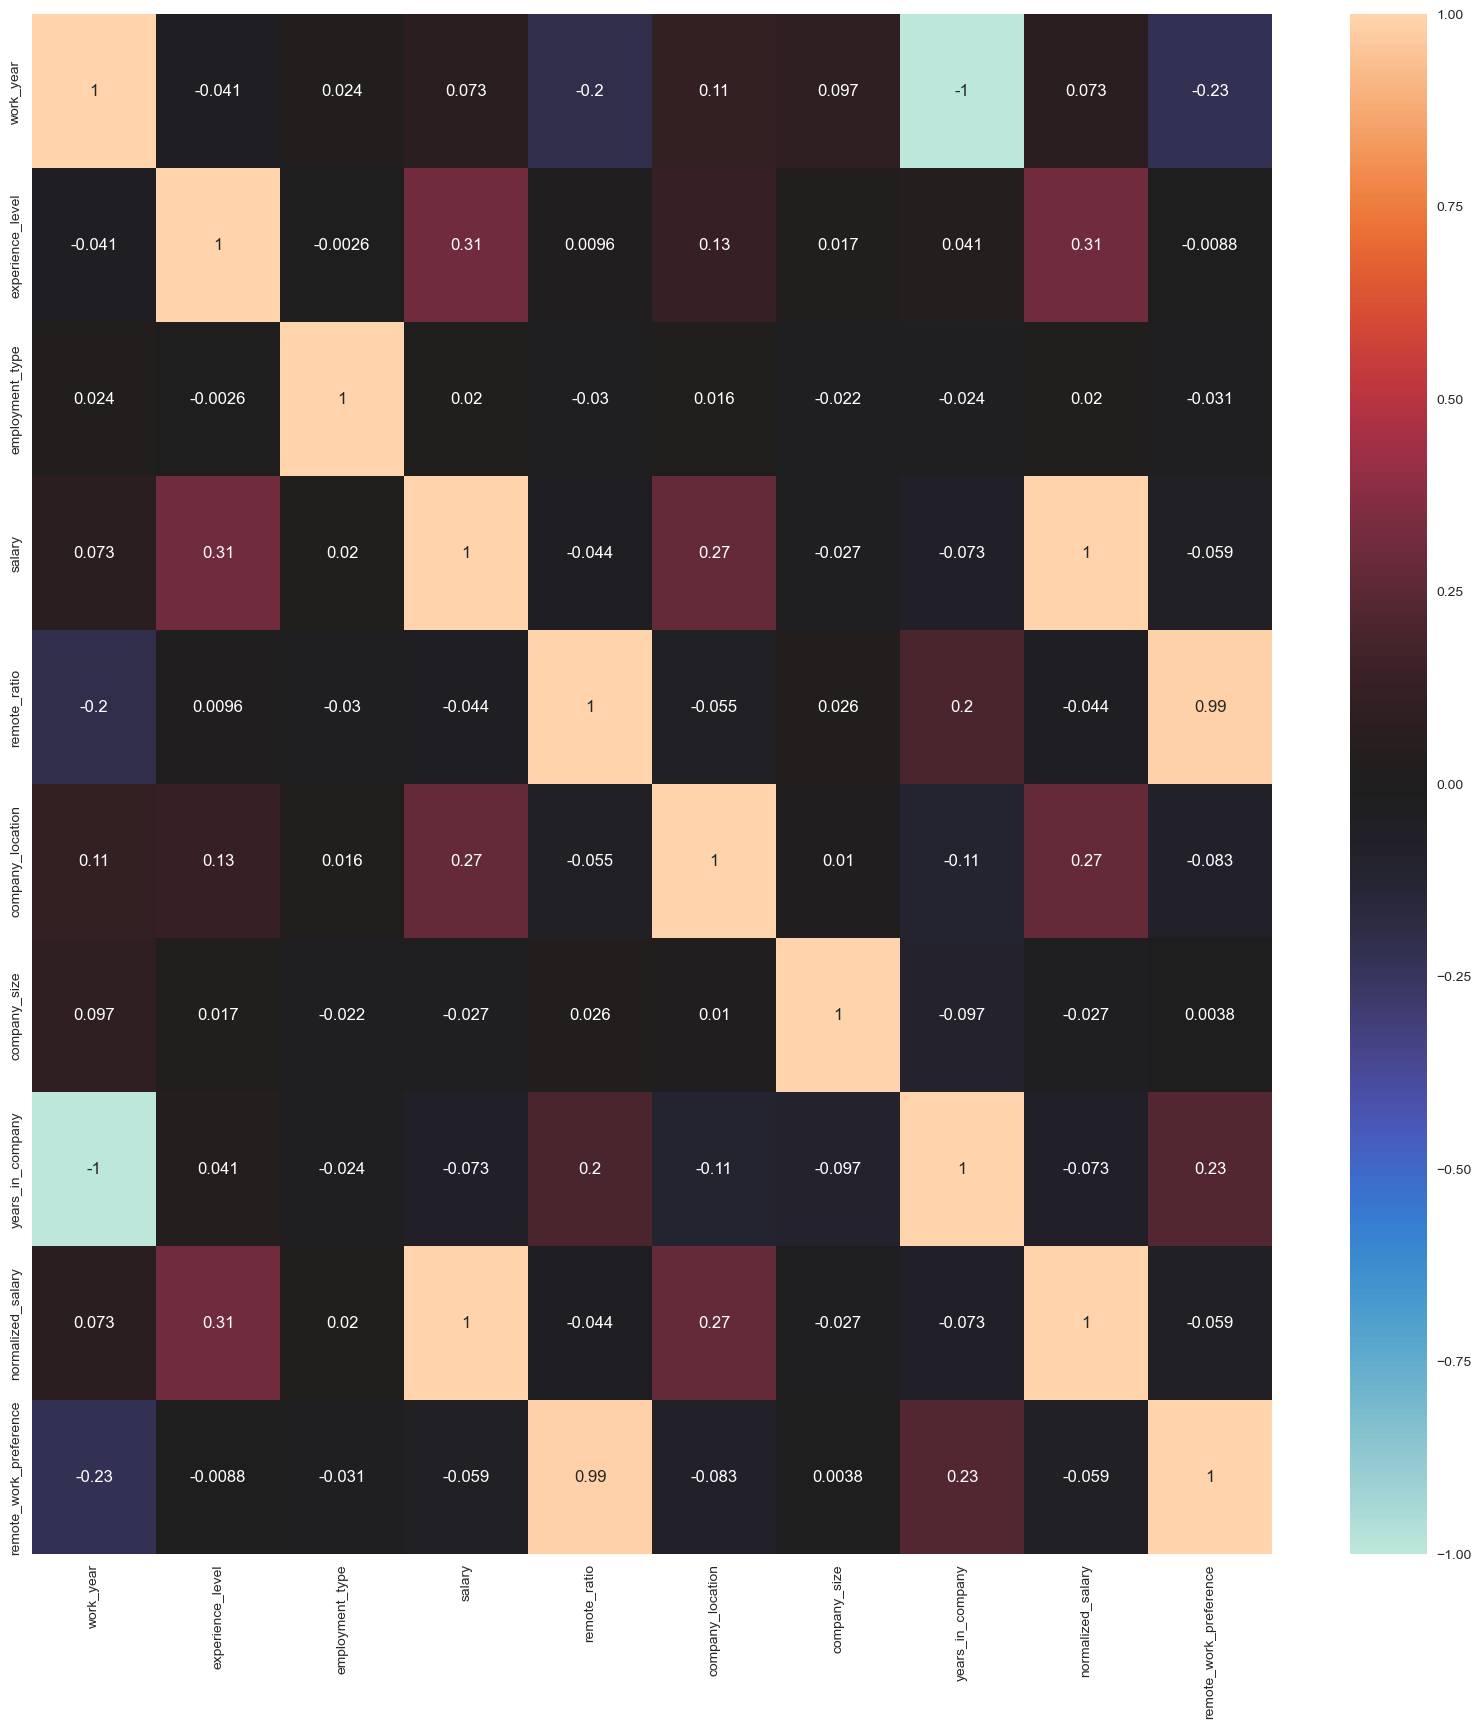

In [ ]:
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, center=0)

# Transformar las variables categóricas
1. Listar las variables categóricas
2. Transformar (codificar) las variables categóricas

In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Variables categóricas en el conjunto de datos: {}".format(object_cols))
print(data.head())

Variables categóricas en el conjunto de datos: []
   work_year  experience_level  employment_type  salary  remote_ratio  \
0       2024                 3                2   90000             0   
1       2024                 3                2  180500             0   
2       2024                 3                2   96200             0   
3       2024                 3                2  235000             0   
4       2024                 3                2  175000             0   

   company_location  company_size  years_in_company  normalized_salary  \
0                 1             0                 0           0.542165   
1                74             1                 0           1.087342   
2                74             1                 0           0.579514   
3                 6             1                 0           1.415653   
4                 6             1                 0           1.054210   

   remote_work_preference  
0                       0  
1         

In [ ]:
#Etiquetar y codificar las características
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("Todas las características son numéricas")
print(data.head())

Todas las características son numéricas
   work_year  experience_level  employment_type  salary  remote_ratio  \
0       2024                 3                2   90000             0   
1       2024                 3                2  180500             0   
2       2024                 3                2   96200             0   
3       2024                 3                2  235000             0   
4       2024                 3                2  175000             0   

   company_location  company_size  years_in_company  normalized_salary  \
0                 1             0                 0           0.542165   
1                74             1                 0           1.087342   
2                74             1                 0           0.579514   
3                 6             1                 0           1.415653   
4                 6             1                 0           1.054210   

   remote_work_preference  
0                       0  
1                   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13663 entries, 0 to 13970
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   work_year               13663 non-null  int64  
 1   experience_level        13663 non-null  int32  
 2   employment_type         13663 non-null  int32  
 3   salary                  13663 non-null  int64  
 4   remote_ratio            13663 non-null  int64  
 5   company_location        13663 non-null  int32  
 6   company_size            13663 non-null  int32  
 7   years_in_company        13663 non-null  int64  
 8   normalized_salary       13663 non-null  float64
 9   remote_work_preference  13663 non-null  int32  
dtypes: float64(1), int32(5), int64(4)
memory usage: 907.3 KB


In [ ]:
# Seleccionar las características a escalar
features_to_scale = ['work_year', 'experience_level', 'employment_type', 'salary',
                     'remote_ratio', 'company_location', 'company_size', 'years_in_company',
                     'remote_work_preference', ]

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Escalar las características seleccionadas
scaled_features = scaler.fit_transform(data[features_to_scale])

# Crear un DataFrame con las características escaladas
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale)

# Agregar la columna 'normalized_salary' del DataFrame original
scaled_data['normalized_salary'] = data['normalized_salary']

# Mostrar el DataFrame resultante
print("Todas las características estan estandarizadas")

Número de componentes principales: 4
Las varianzas explicativas de los componentes son: [2.74640943e-01 1.77100016e-01 1.62316294e-01 1.12868139e-01
 1.07087443e-01 9.42833968e-02 7.08927494e-02 8.11018886e-04
 2.78450992e-33]


In [ ]:
scaled_data.head()

work_year  experience_level  employment_type    salary  remote_ratio  \
0   1.341416          0.592901         0.028943 -0.935536     -0.714427   
1   1.341416          0.592901         0.028943  0.577926     -0.714427   
2   1.341416          0.592901         0.028943 -0.831852     -0.714427   
3   1.341416          0.592901         0.028943  1.489349     -0.714427   
4   1.341416          0.592901         0.028943  0.485948     -0.714427   

   company_location  company_size  years_in_company  remote_work_preference  
0         -4.016850     -3.441653         -1.341416               -0.720385  
1          0.354227      0.197077         -1.341416               -0.720385  
2          0.354227      0.197077         -1.341416               -0.720385  
3         -3.717461      0.197077         -1.341416               -0.720385  
4         -3.717461      0.197077         -1.341416               -0.720385

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

#### Reducción de la dimensionalidad
Agrupar a los empleados en diferentes segmentos o clústeres según sus características laborales y personales.

In [ ]:
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

pca = PCA().fit(scaled_data_imputed)
eigenvalues = pca.explained_variance_
components = np.sum(eigenvalues > 1)
print(components)
varianzas_explicativas = pca.explained_variance_ratio_
print("Las varianzas explicativas de los componentes son: {}".format(varianzas_explicativas))


4
Las varianzas explicativas de los componentes son: [2.74640943e-01 1.77100016e-01 1.62316294e-01 1.12868139e-01
 1.07087443e-01 9.42833968e-02 7.08927494e-02 8.11018886e-04
 2.78450992e-33]


In [ ]:
pca = PCA(n_components=componentes)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3","col4","col5"]))
PCA_ds.describe()

col1          col2          col3          col4          col5
count  13663.000000  1.366300e+04  1.366300e+04  1.366300e+04  1.366300e+04
mean       0.000000 -1.331325e-16  9.152860e-17 -1.040098e-17  1.664156e-17
std        1.572243  1.262544e+00  1.208699e+00  1.007912e+00  9.817625e-01
min       -2.438700 -3.507224e+00 -2.604275e+00 -1.056786e+01 -9.676467e+00
25%       -0.748045 -8.251225e-01 -8.269698e-01 -4.857874e-02 -2.963899e-01
50%       -0.531890  2.603646e-01 -2.553775e-01  1.018295e-01 -1.615346e-01
75%        1.326983  8.076404e-01  5.895875e-01  2.390741e-01  2.086945e-02
max        7.040114  5.906432e+00  4.921195e+00  1.840058e+01  1.496298e+01

## Clustering

#### 1. Hallar el número óptimo de clusters

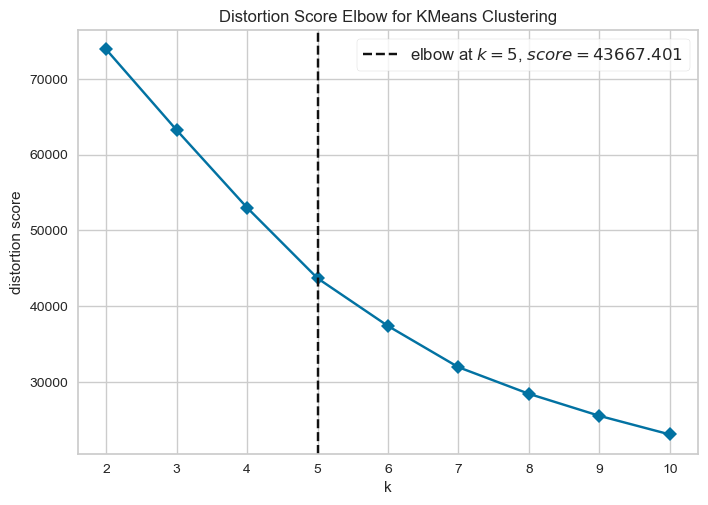

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
modelo = KMeans(n_clusters=3, random_state=42, n_init=10)
codo = KElbowVisualizer(modelo, k=10, timings=False)
codo.fit(PCA_ds)
codo.show()

2. Definir y ejecutar el modelo de clasificación

In [ ]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
predicciones = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = predicciones
data["Clusters"]= predicciones

#### 3. Entender la distribución de los clusters

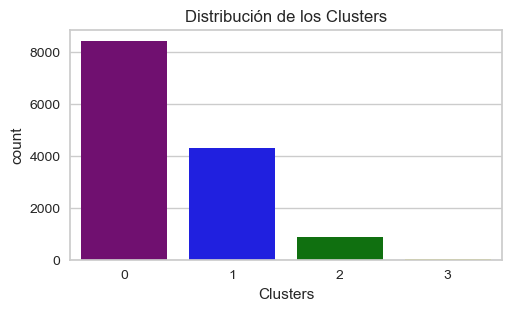

In [ ]:
plt.figure(figsize=(5,3),layout="constrained")
pl = sns.countplot(x=data["Clusters"],palette=['Purple','Blue','Green','Yellow'])
pl.set_title("Distribución de los Clusters")
plt.show()

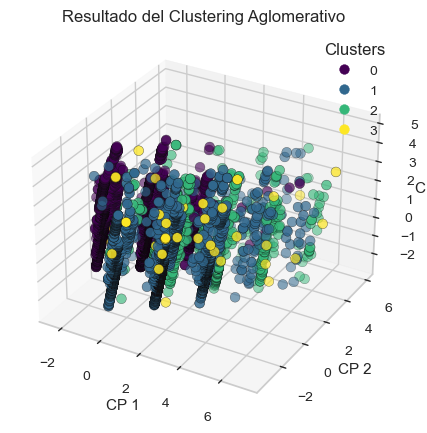

In [ ]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(PCA_ds['col1'], PCA_ds['col2'], PCA_ds['col3'],
                     c=PCA_ds['Clusters'], cmap='viridis', edgecolor='k', s=50)

ax.set_title('Resultado del Clustering Aglomerativo')
ax.set_xlabel('CP 1')
ax.set_ylabel('CP 2')
ax.set_zlabel('CP 3')
ax.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

In [ ]:
import plotly.express as px
fig=px.scatter_3d(PCA_ds,x="col1",y="col2",z="col3",color='Clusters',size_max=8,opacity=0.7)
fig.update_layout(title="Resultado del Clustering Aglomerativo",
                 scene=dict(xaxis_title='CP1',yaxis_title='CP2',zaxis_title='CP3',))
fig.show()

In [ ]:
analisis_cluster = data.groupby('Clusters').describe()
for col in analisis_cluster.columns.levels[0]:
    print("Análisis de cluster para {}:".format(col))
    print(analisis_cluster[col])
    print("--------------------------------------------------------")

Análisis de cluster para work_year:
           count         mean       std     min      25%     50%     75%  \
Clusters                                                                   
0         8430.0  2023.213523  0.574672  2020.0  2023.00  2023.0  2024.0   
1         4304.0  2022.945167  0.716827  2020.0  2023.00  2023.0  2023.0   
2          893.0  2022.608063  0.965098  2020.0  2022.00  2023.0  2023.0   
3           36.0  2022.388889  1.271170  2020.0  2021.75  2023.0  2023.0   

             max  
Clusters          
0         2024.0  
1         2024.0  
2         2024.0  
3         2024.0  
--------------------------------------------------------
Análisis de cluster para experience_level:
           count      mean       std  min  25%  50%  75%  max
Clusters                                                     
0         8430.0  2.489442  0.853524  0.0  2.0  3.0  3.0  3.0
1         4304.0  2.528346  0.847210  0.0  2.0  3.0  3.0  3.0
2          893.0  2.296753  0.997958  0.0  2.

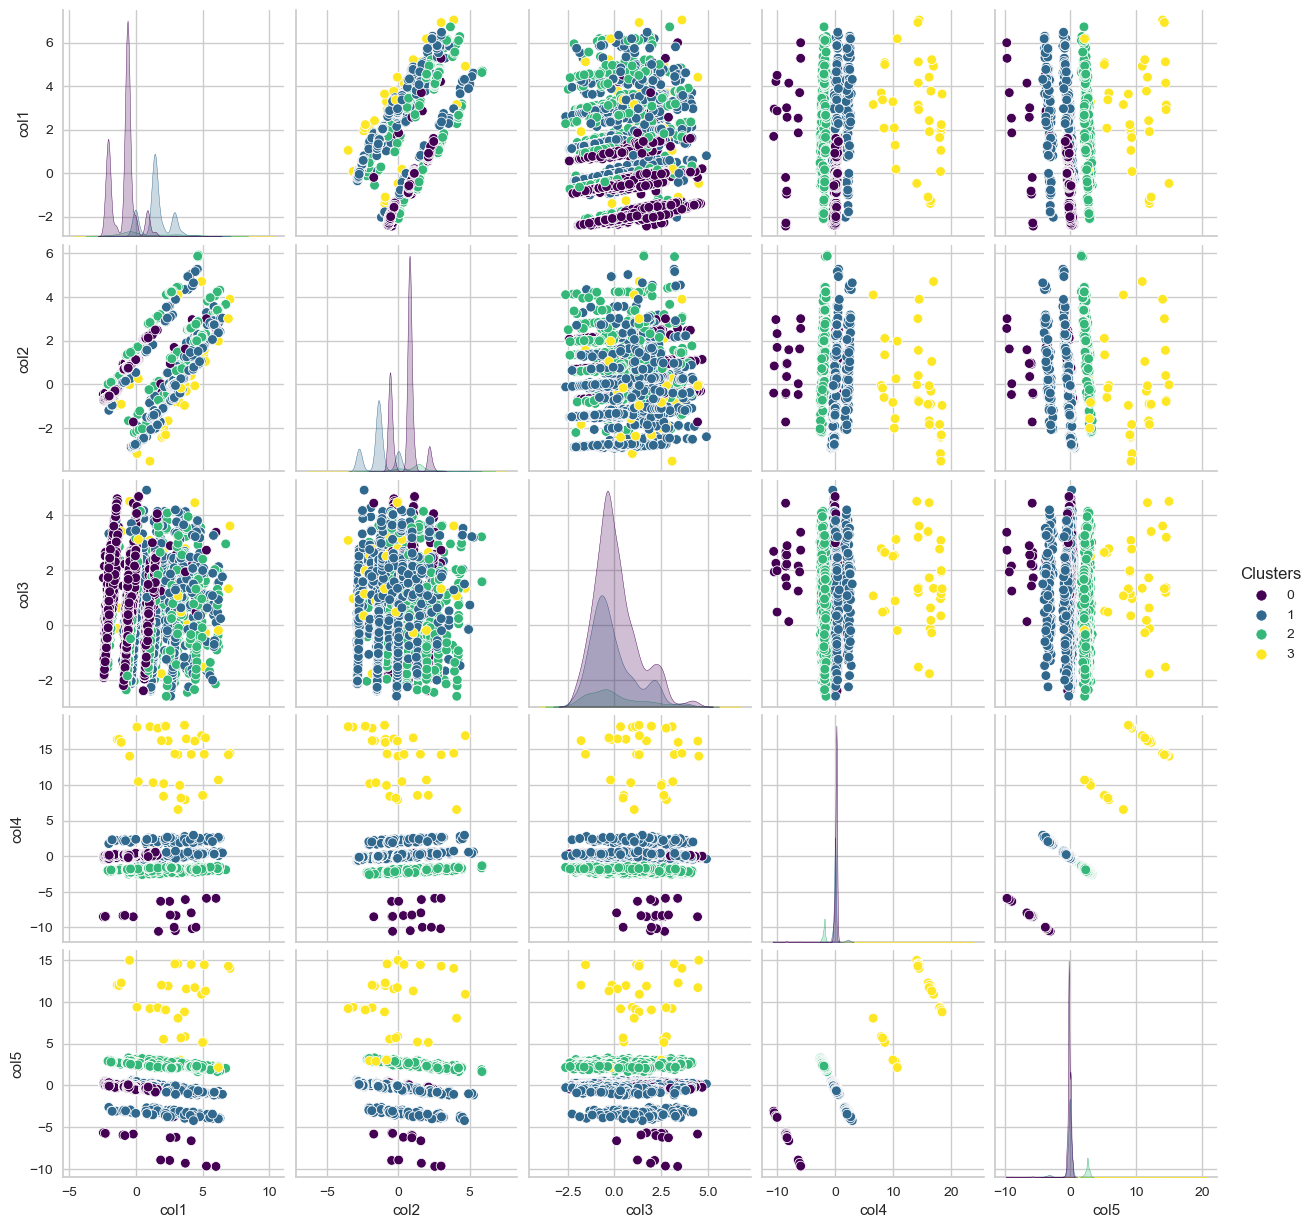

In [ ]:
sns.pairplot(PCA_ds, hue='Clusters', palette='viridis', markers='o')
plt.show()